In [40]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier as DTC, export_graphviz
import pydot
import pydotplus
import re

import time

from IPython.display import Image

In [41]:
Train_data = pd.read_csv('./datalab/car_info_test.csv')
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10122 entries, 0 to 10121
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CUST_ID               10122 non-null  object 
 1   CUST_SEX              10122 non-null  int64  
 2   CUST_AGE              10028 non-null  float64
 3   CUST_MARRY            2476 non-null   object 
 4   BUYERPART             10122 non-null  int64  
 5   CAR_MODEL             10122 non-null  object 
 6   CAR_COLOR             5888 non-null   object 
 7   CAR_AGE               10122 non-null  float64
 8   CAR_PRICE             10122 non-null  float64
 9   IS_LOAN               10122 non-null  float64
 10  LOAN_PERIED           8993 non-null   float64
 11  LOAN_AMOUNT           8993 non-null   float64
 12  F_INSORNOT            8494 non-null   float64
 13  ALL_BUYINS_N          9204 non-null   float64
 14  DLRSI_CNT             9204 non-null   float64
 15  GLASSBUYSEPARATE_CN

In [42]:
Train_data['CUST_AGE'] = Train_data.CUST_AGE.fillna(Train_data.CUST_AGE.mean())
Train_data['CUST_AGE'] = Train_data.CUST_AGE.apply(lambda x: 1 if (x<=35 and x >=16) else 2 if (x >= 36 and x <= 60) else 3)
Train_data['CAR_AGE'] = Train_data.CAR_AGE.apply(lambda x: 1 if (x <=730) else 2 if (x >=731 and x <= 1460) else 3 if (x >= 1461 and x <= 2190) else 4 if (x >= 2191 and x <= 3650) else 5)
Train_data['CAR_PRICE'] = Train_data.CAR_PRICE.apply(lambda x: 1 if (x >=50000 and x <= 90000) else 2 if (x >= 90001 and x<= 150000) else 3 if (x >= 150001 and x <= 300000) else 4)
Train_data['LOAN_AMOUNT'] = Train_data.LOAN_AMOUNT.apply(lambda x: 1 if (x <= 50000) else 2 if(x >=50001 and x <= 200000) else 3 if(x >= 200001 and x <= 500000) else 4)

In [43]:
numerical_cols = Train_data.select_dtypes(exclude = 'object').columns
print(numerical_cols)

Index(['CUST_SEX', 'CUST_AGE', 'BUYERPART', 'CAR_AGE', 'CAR_PRICE', 'IS_LOAN',
       'LOAN_PERIED', 'LOAN_AMOUNT', 'F_INSORNOT', 'ALL_BUYINS_N', 'DLRSI_CNT',
       'GLASSBUYSEPARATE_CNT', 'SII_CNT', 'IS_LOST'],
      dtype='object')


In [44]:
Train_data.head()

,CUST_ID,CUST_SEX,CUST_AGE,CUST_MARRY,BUYERPART,CAR_MODEL,CAR_COLOR,CAR_AGE,CAR_PRICE,IS_LOAN,LOAN_PERIED,LOAN_AMOUNT,F_INSORNOT,ALL_BUYINS_N,DLRSI_CNT,GLASSBUYSEPARATE_CNT,SII_CNT,IS_LOST
0,DD1DE01F1C100B840717E038EB73F9D8,2,2,NaN,1,车型4,银金属色,3,2,1.0,5.0,2,1.0,1.0,1.0,1.0,0.0,0
1,9A718ED5931A03356D534E56FE56868F,1,1,NaN,1,车型4,银金属色,2,2,1.0,5.0,2,1.0,3.0,0.0,3.0,3.0,0
2,C12942417D044961F0EC732BEC4825FD,1,1,NaN,1,车型2,银金属色,2,2,1.0,5.0,1,1.0,1.0,1.0,1.0,1.0,0
3,8B7B11D814A68914C94C1C39CF3E704A,1,2,NaN,1,车型13,珍珠白色,1,4,1.0,5.0,2,1.0,1.0,0.0,1.0,0.0,0
4,7BA6D4CD559FCE50C5ABBA120EA849C2,1,2,NaN,1,车型5,黑色,4,4,1.0,5.0,3,1.0,2.0,1.0,1.0,0.0,1


In [45]:
Train_data.fillna(value=0,inplace=True)

In [46]:
Train_data.isnull().any()

CUST_ID                 False
CUST_SEX                False
CUST_AGE                False
CUST_MARRY              False
BUYERPART               False
CAR_MODEL               False
CAR_COLOR               False
CAR_AGE                 False
CAR_PRICE               False
IS_LOAN                 False
LOAN_PERIED             False
LOAN_AMOUNT             False
F_INSORNOT              False
ALL_BUYINS_N            False
DLRSI_CNT               False
GLASSBUYSEPARATE_CNT    False
SII_CNT                 False
IS_LOST                 False
dtype: bool

In [47]:
feature_cols = [col for col in numerical_cols if col != 'IS_LOST']
data = Train_data[feature_cols].fillna(value=0)
target = Train_data['IS_LOST']
data


,CUST_SEX,CUST_AGE,BUYERPART,CAR_AGE,CAR_PRICE,IS_LOAN,LOAN_PERIED,LOAN_AMOUNT,F_INSORNOT,ALL_BUYINS_N,DLRSI_CNT,GLASSBUYSEPARATE_CNT,SII_CNT
0,2,2,1,3,2,1.0,5.0,2,1.0,1.0,1.0,1.0,0.0
1,1,1,1,2,2,1.0,5.0,2,1.0,3.0,0.0,3.0,3.0
2,1,1,1,2,2,1.0,5.0,1,1.0,1.0,1.0,1.0,1.0
3,1,2,1,1,4,1.0,5.0,2,1.0,1.0,0.0,1.0,0.0
4,1,2,1,4,4,1.0,5.0,3,1.0,2.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10117,1,2,1,2,3,1.0,3.0,2,1.0,3.0,0.0,3.0,1.0
10118,2,1,1,2,2,1.0,4.0,2,1.0,1.0,0.0,0.0,0.0
10119,1,2,1,1,2,1.0,5.0,2,1.0,1.0,0.0,1.0,0.0
10120,2,2,1,2,1,1.0,4.0,2,1.0,2.0,0.0,0.0,0.0


In [48]:
target

0        0
1        0
2        0
3        0
4        1
        ..
10117    0
10118    0
10119    0
10120    1
10121    0
Name: IS_LOST, Length: 10122, dtype: int64

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10122 entries, 0 to 10121
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CUST_SEX              10122 non-null  int64  
 1   CUST_AGE              10122 non-null  int64  
 2   BUYERPART             10122 non-null  int64  
 3   CAR_AGE               10122 non-null  int64  
 4   CAR_PRICE             10122 non-null  int64  
 5   IS_LOAN               10122 non-null  float64
 6   LOAN_PERIED           10122 non-null  float64
 7   LOAN_AMOUNT           10122 non-null  int64  
 8   F_INSORNOT            10122 non-null  float64
 9   ALL_BUYINS_N          10122 non-null  float64
 10  DLRSI_CNT             10122 non-null  float64
 11  GLASSBUYSEPARATE_CNT  10122 non-null  float64
 12  SII_CNT               10122 non-null  float64
dtypes: float64(7), int64(6)
memory usage: 1.0 MB


In [50]:
befordtc = DTC(criterion='entropy')
befordtc.fit(data, target)
print('准确率:', befordtc.score(data, target))
dtc = DTC(criterion='entropy',max_depth=4, max_leaf_nodes=5)
dtc.fit(data, target)
print('准确率:', dtc.score(data, target))


准确率: 0.8678126852400712
准确率: 0.7717842323651453


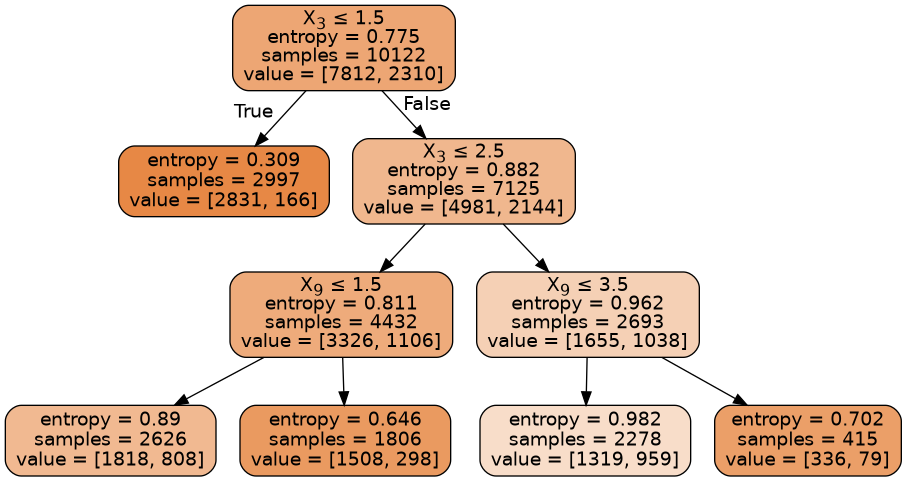

In [51]:
dot_data = tree.export_graphviz(dtc, out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

In [ ]:
with open('./tree.dot', 'w') as f:
    f = export_graphviz(dtc, feature_names=data.columns, out_file=f)
graph = pydotplus.graph_from_dot_file('./tree.dot')
graph.write_pdf("iris.pdf")